Epoch 1/20
20/20 [==============================] - 0s 869us/step - loss: 0.7107 - accuracy: 0.5920
Epoch 2/20
20/20 [==============================] - 0s 624us/step - loss: 0.5079 - accuracy: 0.7620
Epoch 3/20
20/20 [==============================] - 0s 744us/step - loss: 0.4227 - accuracy: 0.8450
Epoch 4/20
20/20 [==============================] - 0s 621us/step - loss: 0.3591 - accuracy: 0.8980
Epoch 5/20
20/20 [==============================] - 0s 613us/step - loss: 0.3023 - accuracy: 0.9250
Epoch 6/20
20/20 [==============================] - 0s 653us/step - loss: 0.2622 - accuracy: 0.9480
Epoch 7/20
20/20 [==============================] - 0s 625us/step - loss: 0.2396 - accuracy: 0.9480
Epoch 8/20
20/20 [==============================] - 0s 583us/step - loss: 0.2123 - accuracy: 0.9550
Epoch 9/20
20/20 [==============================] - 0s 595us/step - loss: 0.1929 - accuracy: 0.9640
Epoch 10/20
20/20 [==============================] - 0s 608us/step - loss: 0.1823 - accuracy: 0.9640

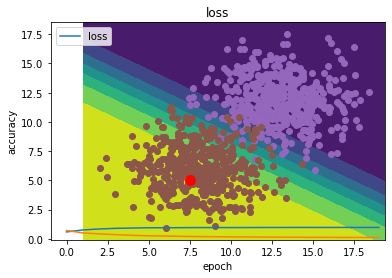

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=20, shuffle='true')

plt.plot(h.history['accuracy'])

plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 5


point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)



